In [54]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [4]:
df_grades = pd.read_csv('Data/grades.csv', on_bad_lines='skip')

In [19]:
df_grades.shape

(24, 3)

In [25]:
df_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        24 non-null     object 
 1   StudyHours  23 non-null     float64
 2   Grade       22 non-null     float64
dtypes: float64(2), object(1)
memory usage: 704.0+ bytes


In [26]:
df_grades

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


# Check for duplicates, NaN

In [7]:
duplicate_values = df_grades.duplicated()

In [10]:
duplicate_values.value_counts()

False    100.0
dtype: float64

In [37]:
df_grades.isna().any(axis=0)

Name          False
StudyHours     True
Grade          True
dtype: bool

In [41]:
df_grades.isna().any(axis=0).value_counts()

True     2
False    1
dtype: int64

In [42]:
df_grades.isna().any(axis=1).value_counts()

False    22
True      2
dtype: int64

# Study Hours and Grades both are numerical values. We can impuet with mean at missing cell

In [46]:
df_grades['StudyHours'].fillna(df_grades['StudyHours'].median(), inplace=True)

In [47]:
df_grades['Grade'].fillna(df_grades['Grade'].median(), inplace=True)

In [48]:
df_grades

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


# Passed list if 60 or greater

In [49]:
passed = df_grades['Grade'] >=60

In [51]:
passed.value_counts()

False    17
True      7
Name: Grade, dtype: int64

In [52]:
df_grades = pd.concat([df_grades, passed.rename("Pass")], axis=1)

In [55]:
df_grades['Result'] = np.where(df_grades['Pass'], 'Pass', 'Fail')

In [56]:
df_grades

,Name,StudyHours,Grade,Pass,Result
0,Dan,10.00,50.0,False,Fail
1,Joann,11.50,50.0,False,Fail
2,Pedro,9.00,47.0,False,Fail
3,Rosie,16.00,97.0,True,Pass
4,Ethan,9.25,49.0,False,Fail
5,Vicky,1.00,3.0,False,Fail
6,Frederic,11.50,53.0,False,Fail
7,Jimmie,9.00,42.0,False,Fail
8,Rhonda,8.50,26.0,False,Fail
9,Giovanni,14.50,74.0,True,Pass


In [62]:
df_grades_failed = df_grades[df_grades['Pass'] == False]
df_grades_passed = df_grades[df_grades['Pass'] == True]

In [66]:
print(df_grades_failed)

        Name  StudyHours  Grade   Pass Result
0        Dan       10.00   50.0  False   Fail
1      Joann       11.50   50.0  False   Fail
2      Pedro        9.00   47.0  False   Fail
4      Ethan        9.25   49.0  False   Fail
5      Vicky        1.00    3.0  False   Fail
6   Frederic       11.50   53.0  False   Fail
7     Jimmie        9.00   42.0  False   Fail
8     Rhonda        8.50   26.0  False   Fail
12   Naiyana        9.00   37.0  False   Fail
13      Kian        8.00   15.0  False   Fail
15    Jakeem        8.00   27.0  False   Fail
16    Helena        9.00   36.0  False   Fail
17     Ismat        6.00   35.0  False   Fail
18     Anila       10.00   48.0  False   Fail
19      Skye       12.00   52.0  False   Fail
22      Bill        8.00   49.5  False   Fail
23       Ted       10.00   49.5  False   Fail


In [67]:
print(df_grades_passed)

         Name  StudyHours  Grade  Pass Result
3       Rosie       16.00   97.0  True   Pass
9    Giovanni       14.50   74.0  True   Pass
10  Francesca       15.50   82.0  True   Pass
11      Rajab       13.75   62.0  True   Pass
14      Jenny       15.50   70.0  True   Pass
20     Daniel       12.50   63.0  True   Pass
21      Aisha       12.00   64.0  True   Pass


# Create a distribution function that accepts the data and calculates the numbers

In [86]:
def show_distribution(var_data):
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    median_val = var_data.median()
    mode_val = var_data.mode()[0]
    
    print(f'Minimum value is {min_val:.2f}\n Maximum value is {max_val:.2f}\n Mean value is {mean_val:.2f}\n Median value is {median_val:.2f}\n Mode value is {mode_val:.2f}')
    
    # Create 2 sub plots
    fig , ax = plt.subplots(2,1,figsize=(10,4))
    
    # Create histogram in the first graph
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')
    
    # Add lines for all the kpi's like min , max , mean , mdeain , mode
    ax[0].axvline(x=min_val, linestyle='dashed', color='gray', linewidth=2)
    ax[0].axvline(x=max_val, linestyle='dashed', color='gray', linewidth=2)
    ax[0].axvline(x=mean_val, linestyle='dashed', color='cyan', linewidth=2)
    ax[0].axvline(x=median_val, linestyle='dashed', color='red', linewidth=2)
    ax[0].axvline(x=mode_val, linestyle='dashed', color='yellow', linewidth=2)
    
    # Plot the boxplot in the secodn graph
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')
    
    fig.suptitle('Data Distribution')
    
    # Show the figure
    fig.show()
    

# Distribution of Grades

Minimum value is 3.00
 Maximum value is 97.00
 Mean value is 49.21
 Median value is 49.50
 Mode value is 49.50


C:\Users\Nikita\anaconda3\envs\PythonEnvThreeDotSeven\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


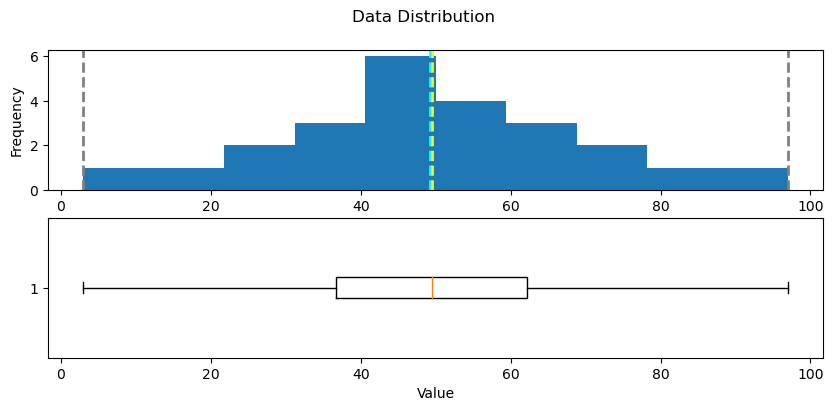

In [87]:
show_distribution(df_grades['Grade'])

# Distribution of study hours

Minimum value is 1.00
 Maximum value is 16.00
 Mean value is 10.40
 Median value is 10.00
 Mode value is 9.00


C:\Users\Nikita\anaconda3\envs\PythonEnvThreeDotSeven\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


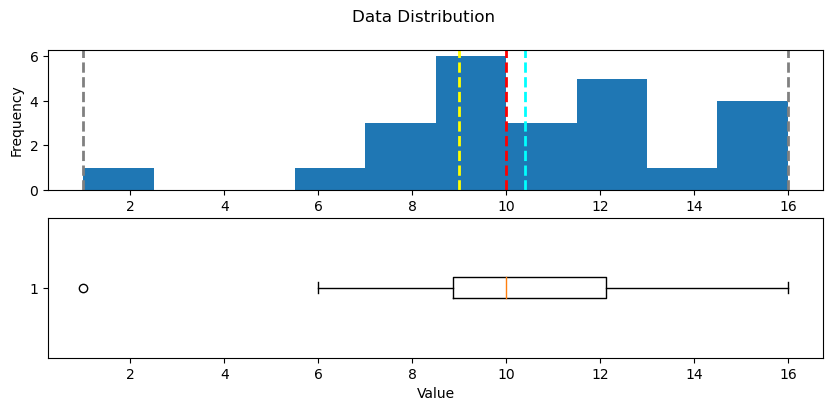

In [88]:
show_distribution(df_grades['StudyHours'])

# Density

In [94]:
def show_density(var_data):
    fig = plt.figure(figsize=(10,4))
    var_data.plot.density()
    plt.title('Data Density')
    
    # Show the mean, median and the mode
    plt.axvline(x=var_data.mean(), color='cyan', linestyle='dashed', linewidth=2)
    plt.axvline(x=var_data.median(), color='red', linestyle='dashed', linewidth=2)
    plt.axvline(x=var_data.mode()[0], color='yellow', linestyle='dashed', linewidth=2)
    
    plt.show()

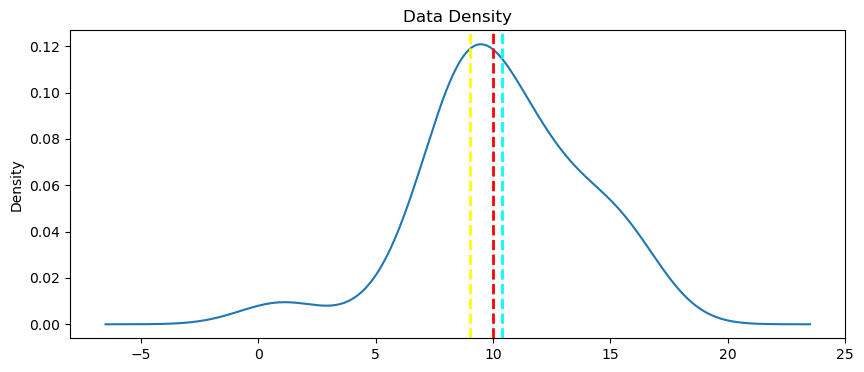

In [95]:
show_density(df_grades['StudyHours'])

In [112]:
def show_variance(var_data):
    min_val = var_data.min()
    max_val = var_data.max()
    range = max_val - min_val
    variance = var_data.var()
    sd = var_data.std()
    print(f'Range is {range:.2f}\nVariance is {variance:2f}\nStandard Deviation is {sd:2f}')

In [113]:
show_variance(df_grades['Grade'])

Range is 94.00
Variance is 431.454710
Standard Deviation is 20.771488
